<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Asignatura:</b></i> Machine Learning
<br>
<i><b>Estudiante:</b></i> Laura Gomez
<br>
<br>
Abril/2023
<br>
</FONT>
</div>

#**Librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#**Parte 1 Preprocesamiento**

---
###**Usando el dataset de diabetes,  dividir en train y test con un random_state de 42 y test_size de 0.3:**
https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv").head(30)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Se revisa la información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               30 non-null     int64  
 1   Glucose                   30 non-null     int64  
 2   BloodPressure             30 non-null     int64  
 3   SkinThickness             30 non-null     int64  
 4   Insulin                   30 non-null     int64  
 5   BMI                       30 non-null     float64
 6   DiabetesPedigreeFunction  30 non-null     float64
 7   Age                       30 non-null     int64  
 8   Outcome                   30 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.2 KB


In [ ]:
#Se procede a convertir los tipos de datos a int
df['BMI'] = df['BMI'].astype(int)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(int)
#---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               30 non-null     int64
 1   Glucose                   30 non-null     int64
 2   BloodPressure             30 non-null     int64
 3   SkinThickness             30 non-null     int64
 4   Insulin                   30 non-null     int64
 5   BMI                       30 non-null     int64
 6   DiabetesPedigreeFunction  30 non-null     int64
 7   Age                       30 non-null     int64
 8   Outcome                   30 non-null     int64
dtypes: int64(9)
memory usage: 2.2 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [ ]:
#Se normalizan los datos
normalizador = StandardScaler().fit(df)
transformed_df = normalizador.transform(df)
transformed_df = pd.DataFrame(transformed_df)
#Escalado
standar_scaler = StandardScaler()

In [ ]:
preprocessor = Pipeline(
    steps=[("scaler", standar_scaler)])

In [ ]:
transformed_df = preprocessor.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']])
transformed_df = pd.DataFrame(transformed_df, columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'], index = df.index)
transformed_df['Outcome'] = df['Outcome']
transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.142971,0.556304,0.147411,1.046979,-0.571129,0.201267,-0.252646,1.052008,1
1,-1.197383,-1.397999,-0.107724,0.688015,-0.571129,-0.627479,-0.252646,-0.651528,0
2,0.679113,1.642028,-0.192768,-1.046979,-0.571129,-0.982656,-0.252646,-0.561868,1
3,-1.197383,-1.273916,-0.107724,0.329050,-0.046338,-0.390694,-0.252646,-1.548125,0
4,-1.465454,0.215077,-1.213307,1.046979,0.366796,1.385189,4.800266,-0.472208,1


In [ ]:
#Se define X y y
X = transformed_df.drop(['Outcome'],axis = 1)
y = transformed_df['Outcome']

In [ ]:
#Se particiona el dataset en entrenamiento y prueba, es importante mencionar que se usa stratify para la distribución de los datos
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

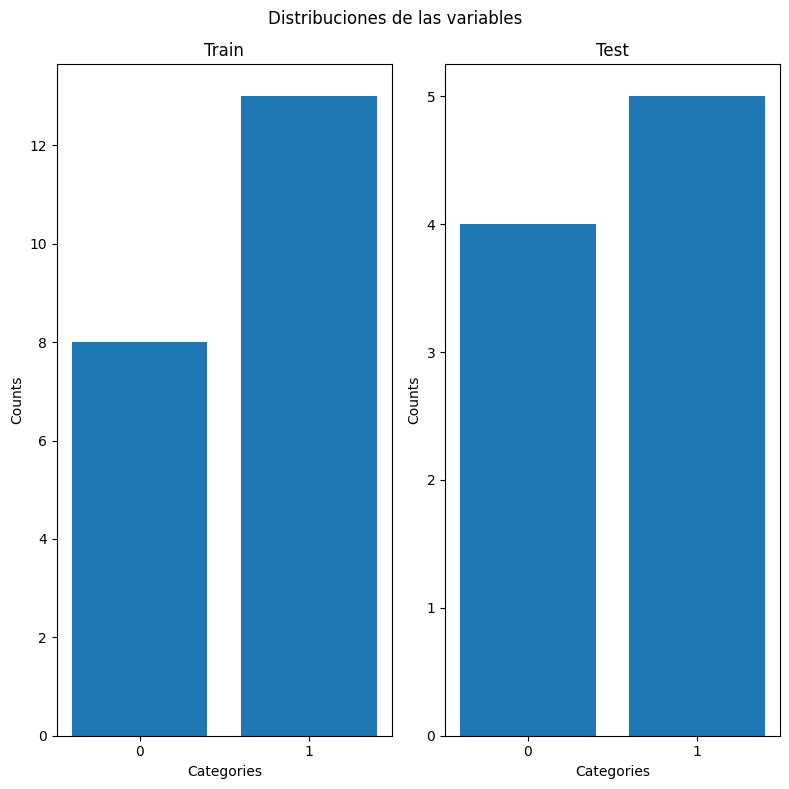

In [ ]:
#Se visualizan la distribución de los datos en Train y Test
fig, axes = plt.subplots(1,2, figsize=(8,8))
fig.suptitle('Distribuciones de las variables')
ax = axes[0]
ax.bar(*np.unique(y_train, return_counts=True))
ax.set(xlabel="Categories", ylabel="Counts", xticks=[0,1], title="Train")

ax = axes[1]
ax.bar(*np.unique(y_test, return_counts=True))
ax.set(xlabel="Categories", ylabel="Counts", xticks=[0,1], title="Test");
fig.tight_layout()

---
###**Implementar y entrenar una regresión logística con descenso del gradiente creando las siguientes funciones:**
def cost_function(y, y_hat):

def predict(x…w…b):


def predict_proba(x…w…b):

def get_gradients(x, … y_train, y_hat,w  … b):

def update_params(w, …, b, dw, …, db, learning_rate=0.1)

def reg_log(x1.., …, y, niter=100, learning_rate=0.1


In [ ]:
#La función de costo es la misma entropia cruzada binaria para comparar lo predicho con lo real
def cost_function(y,yhat):
    #número total de datos
    n = len(y)
    #función de costo literalmente como se muestra
    costo = (-1/n) * np.sum( y * np.log(yhat) + (1-y) * np.log( 1-yhat) )
    return costo

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def predict(x, w, b):
    #solo para recordar como explicación para nosotros
    #producto punto de x con su respectivo peso w + el umbral (Red neuronal)
    z = np.dot(x, w) + b
    yhat = sigmoid(z)
    return np.round(yhat).astype(int)

In [ ]:
def predict_proba(x, w, b):
    z = np.dot(x, w) + b
    yhat = sigmoid(z)
    return yhat

In [ ]:
def get_gradients(x, y_train, yhat, w , b):
    m = len(y)
    #diferencia entre los datos predichos y los datos de entrenamiento (errores)
    diferencia = (yhat-y_train)
    #se utiliza para calcular el gradiente del costo con respecto a los pesos w. ALIAS DERIVADA
    #(ygorrito-y)* xi divido el número de datos
    dw = (1/m) * np.dot(x.T,diferencia)
    #suma de los errores ALIAS DERIVADA
    db = (1/m) * np.sum(diferencia)
    return dw,db


In [ ]:
#La función actualiza los mejores valores de w y b
def update_params(w, b, dw, db, learning_rate=0.1):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b

In [ ]:
def reg_log (X_train, y_train, niter=100, learning_rate=0.1):
     # Número de columnas de X_train
     n = np.size(X_train, axis = 1)
     #Se define el valor del peso, en lo posible se buscan datos aleatorios pequeños
     w = np.random.randn(n)
     #Se define el valor de b (umbral)
     b = np.random.randn()

     for i in range(niter):
         #Se calcula el valor predicho
         yhat = predict_proba(X_train, w, b)
         #Se calcula el costo del valor predicho con el verdadero en este caso y_train
         costo = cost_function(y_train, yhat)
         #Se imprime el costo de esa iteración
         print(f"Costo de iteración {i}:{costo}")

         #Se calculan las derivadas de w y b
         dw, db = get_gradients(X_train, y_train, yhat, w, b)

         #Actualizamos w y b
         w, b = update_params(w, b, dw, db, learning_rate)

     return w,b


---
###**a) Calcular accuracy en train y test**


In [ ]:
wsito, bsito = reg_log(X_train, y_train)

Costo de iteración 0:1.1953195004952273
Costo de iteración 1:1.1833462666614931
Costo de iteración 2:1.1714688636456256
Costo de iteración 3:1.1596885231408545
Costo de iteración 4:1.1480064668977352
Costo de iteración 5:1.1364239046593347
Costo de iteración 6:1.1249420320175925
Costo de iteración 7:1.1135620281924619
Costo de iteración 8:1.1022850537360949
Costo de iteración 9:1.0911122481650957
Costo de iteración 10:1.0800447275246852
Costo de iteración 11:1.0690835818895306
Costo de iteración 12:1.0582298728069561
Costo de iteración 13:1.047484630689307
Costo de iteración 14:1.036848852163322
Costo de iteración 15:1.026323497385537
Costo de iteración 16:1.0159094873339156
Costo de iteración 17:1.005607701087105
Costo de iteración 18:0.9954189731039391
Costo de iteración 19:0.9853440905169752
Costo de iteración 20:0.9753837904550039
Costo de iteración 21:0.9655387574105517
Costo de iteración 22:0.9558096206693477
Costo de iteración 23:0.9461969518195922
Costo de iteración 24:0.936701

In [ ]:
y_train_pred = predict(X_train, wsito, bsito)
y_test_pred = predict(X_test, wsito, bsito)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Precisión en entrenamiento:", train_acc)
print("Precisión en prueba:", test_acc)

Precisión en entrenamiento: 0.6666666666666666
Precisión en prueba: 0.5555555555555556


---
###**b) Utilizar SGDClassifier y LogisticRegression de SKLearn para crear otros 2 modelos. Revisar valores de costo, y evaluar accuracy en train y test. Analizar coeficientes y comparar resultados con los de su código.**


In [ ]:
model_sgd =  SGDClassifier(loss='log', max_iter = 100, random_state = 42, learning_rate = 'constant', eta0=0.1)
model_sgd.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(eta0=0.1, learning_rate='constant', loss='log', max_iter=100,
              random_state=42)

In [ ]:
y_pred_train_sgd = model_sgd.predict(X_train)
y_pred_test_sgd = model_sgd.predict(X_test)

In [ ]:
print("Costo en train SGDClassifier: ", log_loss(y_train, model_sgd.predict_proba(X_train)))
print("Costo en test SGDClassifier: ", log_loss(y_test, model_sgd.predict_proba(X_test)))
print("Accuracy en train SGDClassifier: ", accuracy_score(y_train, y_pred_train_sgd))
print("Accuracy en test SGDClassifier: ", accuracy_score(y_test, y_pred_test_sgd))

Costo en train SGDClassifier:  0.12240857127152971
Costo en test SGDClassifier:  5.2923667666285095
Accuracy en train SGDClassifier:  0.9523809523809523
Accuracy en test SGDClassifier:  0.5555555555555556


In [ ]:
model_logis = LogisticRegression( max_iter = 100, random_state = 42)
model_logis.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
y_pred_train_logis = model_logis.predict(X_train)
y_pred_test_logis = model_logis.predict(X_test)

In [ ]:
print("Costo en train LogisticRegressionr: ", log_loss(y_train, model_logis.predict_proba(X_train)))
print("Costo en test LogisticRegression: ", log_loss(y_test, model_logis.predict_proba(X_test)))
print("Accuracy en train LogisticRegression: ", accuracy_score(y_train, y_pred_train_logis))
print("Accuracy en test LogisticRegression: ", accuracy_score(y_test, y_pred_test_logis))

Costo en train LogisticRegressionr:  0.3027126063797734
Costo en test LogisticRegression:  1.8380642784247097
Accuracy en train LogisticRegression:  0.9523809523809523
Accuracy en test LogisticRegression:  0.5555555555555556


En general, para los datos de entrenamiento, los valores de accuracy son altos usando los modelos de Sklearn. Los valores de accuracy para el modelo implementado por el equipo dan menor al de Sklearn. Sin embargo, se puede apreciar un sobreajuste en accuracy debido a que los valores son muy buenos, no obstante en los de prueba no lo son.

---
###**c) Dibujar las muestras y la frontera de Decisión para un modelo utilizando el código creado,  usando las 30 primeras muestras del dataset de diabetes y las siguientes variables de entrada :**
Pregnancies
Glucose
BloodPressure

In [ ]:
X = transformed_df[['Pregnancies', 'Glucose', 'BloodPressure']].values[:30]
y = transformed_df['Outcome'].values[:30]

In [ ]:
w, b = reg_log(X, y)

Costo de iteración 0:0.7643153181819445
Costo de iteración 1:0.7528448047153984
Costo de iteración 2:0.7419335908532119
Costo de iteración 3:0.7315601456747755
Costo de iteración 4:0.7217029839301435
Costo de iteración 5:0.7123407768935073
Costo de iteración 6:0.7034524505797194
Costo de iteración 7:0.695017271330081
Costo de iteración 8:0.6870149190912196
Costo de iteración 9:0.6794255489555975
Costo de iteración 10:0.67222984170836
Costo de iteración 11:0.6654090442404264
Costo de iteración 12:0.6589450007511489
Costo de iteración 13:0.6528201756853791
Costo de iteración 14:0.647017669338842
Costo de iteración 15:0.6415212270309545
Costo de iteración 16:0.6363152426930917
Costo de iteración 17:0.6313847576588745
Costo de iteración 18:0.6267154553762377
Costo de iteración 19:0.6222936526924581
Costo de iteración 20:0.618106288295662
Costo de iteración 21:0.6141409088314539
Costo de iteración 22:0.6103856531523038
Costo de iteración 23:0.6068292351009577
Costo de iteración 24:0.6034609

<Figure size 640x480 with 0 Axes>

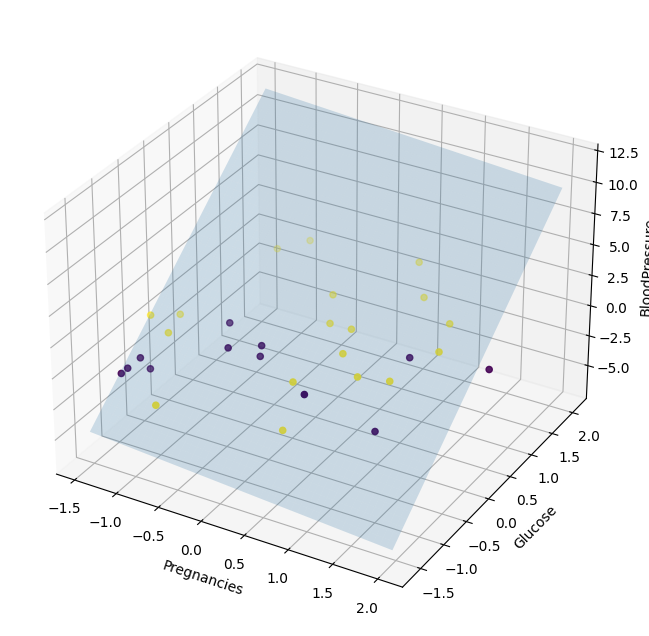

In [ ]:
w = w.reshape(1, -1)
fig = plt.figure()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
x2_min, x2_max = X[:, 1].min(), X[:, 1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
z = (-b - w[0,0]*xx1 - w[0,1]*xx2) / w[0,2]
ax.plot_surface(xx1, xx2, z, alpha=0.2)
ax.set_xlabel('Pregnancies')
ax.set_ylabel('Glucose')
ax.set_zlabel('BloodPressure')
plt.show()

#**Parte 2**

###**Usando el dataset de housing (train y test) . Implementar y entrenar una regresión lineal con descenso del gradiente creando las siguientes funciones:**

def cost_function(y, y_hat):

def predict(x…w…b):

def get_gradients(x, … y_train, y_hat,w  … b):

def update_params(w, …, b, dw, …, db, learning_rate=0.1)

def reg_lineal(x1.., …, y, niter=100, learning_rate=0.1

**se debe imprimir el costo en cada iteración

In [ ]:
df_housing_train = pd.read_csv("https://raw.githubusercontent.com/LauEsGoAm372/Parcial2_Machine_Learning/main/california_housing_train.csv")

In [ ]:
df_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df_housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df_housing_test = pd.read_csv("https://raw.githubusercontent.com/LauEsGoAm372/Parcial2_Machine_Learning/main/california_housing_test.csv")

In [ ]:
df_housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
df_housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
#Se normalizan los datos para train
transformed_df_housing_train = StandardScaler().fit(df_housing_train)
#Escalado
standar_scaler = StandardScaler()

In [ ]:
preprocessor = Pipeline(
    steps=[("scaler", standar_scaler)])

In [ ]:
transformed_df_housing_train = preprocessor.fit_transform(df_housing_train[['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']])
transformed_df_housing_train = pd.DataFrame(transformed_df_housing_train, columns = ['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'], index = df_housing_train.index)
transformed_df_housing_train['median_house_value'] = df_housing_train['median_house_value']
transformed_df_housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,66900.0
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,80100.0
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,85700.0
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,73400.0
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,65500.0


---

In [ ]:
#Se normalizan los datos para test
transformed_df_housing_test = StandardScaler().fit(df_housing_test)
#transformed_df_housing_test = normalizador.transform(df_housing_test)
#transformed_df_housing_test = pd.DataFrame(transformed_df_housing_test)
#Escalado
standar_scaler = StandardScaler()

In [ ]:
preprocessor = Pipeline(
    steps=[("scaler", standar_scaler)])

In [ ]:
transformed_df_housing_test = preprocessor.fit_transform(df_housing_test[['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']])
transformed_df_housing_test = pd.DataFrame(transformed_df_housing_test, columns = ['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'], index = df_housing_test.index)
transformed_df_housing_test['median_house_value'] = df_housing_test['median_house_value']
transformed_df_housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.233729,0.814633,-0.147000,0.596418,0.315337,0.130246,0.317734,1.510745,344700.0
1,0.646344,-0.645931,1.127565,-0.505550,-0.529255,-0.576296,-0.582743,-0.112324,176500.0
2,0.892007,-0.871356,-0.147000,0.459078,-0.055225,0.078808,0.013926,1.071149,270500.0
3,0.616263,-0.852570,-0.067340,-1.175083,-1.239098,-1.313894,-1.310788,1.255865,330000.0
4,-0.040509,0.326213,-0.784282,-0.630362,-0.688068,-0.536504,-0.692223,-0.469081,81700.0


---

In [ ]:
def cost_function(y, y_hat):
    m = len(y)
    J = np.sum((y_hat - y) ** 2) / (2 * m)
    return J

def predict(x, w, b):
    y_hat = np.dot(x, w) + b
    return y_hat

def get_gradients(x, y_train, y_hat, w, b):
    m = len(y_train)
    dw = (1/m) * np.dot(x.T, (y_hat - y_train))
    db = (1/m) * np.sum(y_hat - y_train)
    return dw, db

def update_params(w, b, dw, db, learning_rate=0.1):
    w = w - learning_rate * dw

In [ ]:
#La función actualiza los mejores valores de w y b
def update_params(w, b, dw, db, learning_rate=0.001):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b

In [ ]:
def regresion_lineal(X_train, y_train, niter=1000, learning_rate=0.001):
    # Número de columnas de X_train
    n = np.size(X_train, axis=1)
    w = np.random.randn(n)
    #Se define el valor de b (umbral)
    b = np.random.randn()

    for i in range(niter):
        #Se calcula el valor predicho
        yhat = predict(X_train, w, b)
        #Se calcula el costo del valor predicho con el verdadero en este caso y_train
        costo = cost_function(y_train, yhat)
        #Se imprime el costo de esa iteración
        print(f"Costo de iteración {i}:{costo}")

        #Se calculan las derivadas de w y b
        dw, db = get_gradients(X_train, y_train, yhat, w, b)

        #Actualizamos w y b
        w, b = update_params(w, b, dw, db, learning_rate)

    return w, b

---
###**a) Calcular mse en train y test**

In [ ]:
X_housing_train = transformed_df_housing_train.drop('median_house_value', axis=1)
y_housing_train = transformed_df_housing_train['median_house_value']

In [ ]:
w_train, b_train = regresion_lineal(X_housing_train, y_housing_train)

Costo de iteración 0:28212611139.10782
Costo de iteración 1:28162441171.3812
Costo de iteración 2:28112372291.651035
Costo de iteración 3:28062404289.123657
Costo de iteración 4:28012536953.493206
Costo de iteración 5:27962770074.940178
Costo de iteración 6:27913103444.129944
Costo de iteración 7:27863536852.21127
Costo de iteración 8:27814070090.81484
Costo de iteración 9:27764702952.05186
Costo de iteración 10:27715435228.512543
Costo de iteración 11:27666266713.264717
Costo de iteración 12:27617197199.852352
Costo de iteración 13:27568226482.29416
Costo de iteración 14:27519354355.082157
Costo de iteración 15:27470580613.180264
Costo de iteración 16:27421905052.02286
Costo de iteración 17:27373327467.513443
Costo de iteración 18:27324847656.023167
Costo de iteración 19:27276465414.38951
Costo de iteración 20:27228180539.914833
Costo de iteración 21:27179992830.36505
Costo de iteración 22:27131902083.96826
Costo de iteración 23:27083908099.413315
Costo de iteración 24:27036010675.848

In [ ]:
# Obtener las predicciones para el conjunto de entrenamiento
y_housing_train_pred = predict(X_housing_train, w_train, b_train)

In [ ]:
# Calcular el MSE en train
mse_train = mean_squared_error(y_housing_train, y_housing_train_pred)

---

In [ ]:
# Obtener las predicciones para el conjunto de prueba
X_housing_test = transformed_df_housing_test.drop('median_house_value', axis=1)
y_housing_test = transformed_df_housing_test['median_house_value']

In [ ]:
w_test, b_test = regresion_lineal(X_housing_test, y_housing_test, niter=100, learning_rate=0.1)

Costo de iteración 0:27582111519.963913
Costo de iteración 1:22924552462.858166
Costo de iteración 2:19164841001.99296
Costo de iteración 3:16121447685.165203
Costo de iteración 4:13654328261.642994
Costo de iteración 5:11652668695.164204
Costo de iteración 6:10027690031.983326
Costo de iteración 7:8707843382.218475
Costo de iteración 8:7635302022.7279
Costo de iteración 9:6763264924.606083
Costo de iteración 10:6053827715.723396
Costo de iteración 11:5476279388.716348
Costo de iteración 12:5005730978.311327
Costo de iteración 13:4622008160.791017
Costo de iteración 14:4308755662.613718
Costo de iteración 15:4052712424.6111155
Costo de iteración 16:3843124725.8027267
Costo de iteración 17:3671270890.4157033
Costo de iteración 18:3530076295.7336636
Costo de iteración 19:3413801481.3099103
Costo de iteración 20:3317789448.434593
Costo de iteración 21:3238260893.4140053
Costo de iteración 22:3172148263.852078
Costo de iteración 23:3116961262.414016
Costo de iteración 24:3070677826.4826245

In [ ]:
y_housing_test_pred = predict(X_housing_test, w_test, b_test)

In [ ]:
# Calcular el MSE en test
mse_test = mean_squared_error(y_housing_test, y_housing_test_pred)

In [ ]:
print(f"MSE en train: {mse_train:.2f}")
print(f"MSE en test: {mse_test:.2f}")

MSE en train: 12951241188.78
MSE en test: 5137846928.41


---
###**b) Utilizar SGDRegressor y LinearRegression SKLearn para crear otros 2 modelos. Revisar valores de costo, y evaluar mse en train y test. Analizar coeficientes y resultados. Comparar con los obtenidos por su código.**

In [ ]:
model_sgd =  SGDClassifier(loss='log_loss', max_iter = 100, random_state = 42, learning_rate = 'constant', eta0=0.1)
model_sgd.fit(X_housing_train,y_housing_train)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log_loss', max_iter=100,
              random_state=42)

In [ ]:
y_housing_train_sgd2 = model_sgd.predict(X_housing_train)
y_housing_test_sgd2 = model_sgd.predict(X_housing_test)

In [ ]:
mse_train = mean_squared_error(y_housing_train, y_housing_train_sgd2)
mse_test = mean_squared_error(y_housing_test, y_housing_test_sgd2)
print(f"MSE en train SGD: {mse_train:.2f}")
print(f"MSE en test SGD: {mse_test:.2f}")

MSE en train SGD: 24437272119.79
MSE en test SGD: 24919636418.16


---

In [ ]:
model_logis = LogisticRegression(max_iter = 100, random_state = 42)
model_logis.fit(X_housing_train, y_housing_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_train_logis2 = model_logis.predict(X_housing_train)
y_pred_test_logis2 = model_logis.predict(X_housing_test)

In [ ]:
mse_train = mean_squared_error(y_housing_train, y_pred_train_logis2)
mse_test = mean_squared_error(y_housing_test, y_pred_test_logis2)
print(f"MSE en train SGD: {mse_train:.2f}")
print(f"MSE en test SGD: {mse_test:.2f}")

MSE en train SGD: 23125902948.44
MSE en test SGD: 23341708593.21


Al realizar un análisis de los resultados obtenidos por medio de la medición de errores al usar el MSE, podemos deducir que el MSE para test se redujo significativamente implementando los modelos de Sklearn, a pesar de que ambos valores se acercan. Por otro lado, es importante identificar que debido a la gran dispersión de los datos, el resultado de los valores de error usando el MSE serán elevados para ambos casos.

---
###**C) Crear un modelo usando sólo las variables longitud y latitud y graficar las muestras y  el plano resultante.**

In [ ]:
X_train = df_housing_train[['longitude', 'latitude']]
y_train = df_housing_train['median_house_value']

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Obtener las predicciones del modelo
y_pred = reg.predict(X_train)

In [ ]:
# Obtener los colores de los puntos en función de la longitud y latitud
c = np.arctan2(X_train['latitude'], X_train['longitude'])

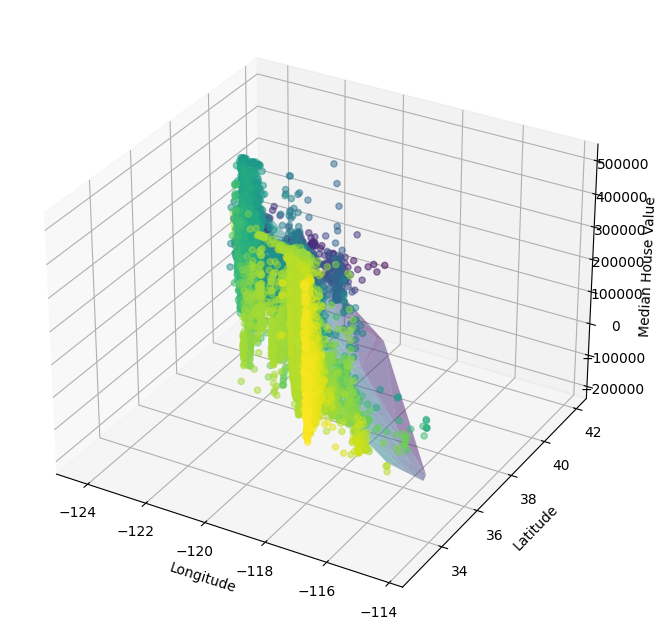

In [ ]:
# Graficar las muestras y el plano resultante
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['longitude'], X_train['latitude'], y_train, c=c, marker='o', alpha=0.5)
ax.plot_trisurf(X_train['longitude'], X_train['latitude'], y_pred, cmap='viridis', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median House Value')
plt.show()